In [1]:
import pandas as pd
import numpy as np
from ggplot import *
%matplotlib inline

In [2]:
# Load the run history data and fix coltypes:
df = pd.read_pickle('runHist.pkl')
colTypes = {'qV': float, 'reward': float,'alpha':float, 'deadline':int}
for c in colTypes:
    df[c] = df[c].apply(lambda x: colTypes[c](x)) 

# Create some reporting features
df['Error'] = df['reward'].apply(lambda x: 1 if x < 0 else 0)
df['Steps'] = 1

In [14]:
#df[:10]
len(df[(df['experiment']=='gamma') & (df['trip']==1) & (df['counter']==1) & (df['alpha']==0.3) & (df['gamma']==0.3)])

19

In [7]:
df.groupby(['experiment','alpha','gamma','trip']).agg({'Steps':'sum','Error':'sum','deadline':'max'})

deadline  Steps  Error
experiment alpha gamma trip                        
alpha      0.05  0.30  1           45    587    145
                       2           55    559    106
                       3           45    471     60
                       4           40    373     42
                       5           45    445     25
                       6           60    462     31
                       7           50    406     17
                       8           55    403     13
                       9           40    405     12
                       10          55    478     13
                       11          45    450      7
                       12          45    383     10
                       13          50    454      9
                       14          50    441      2
                       15          50    438      3
                       16          45    387      1
                       17          50    478      4
                       18          45    408      1
                       19          40    377      1
                       20          50    466      3
                       21          50    414      1
                       22          45    380      1
                       23          40    376      0
                       24          40    394      1
                       25          55    387      0
                       26          55    416      1
                       27          55    328      1
                       28          50    403      0
                       29          60    378      0
                       30          40    344      0
...                               ...    ...    ...
gamma      0.30  0.55  70          60    376      1
                       71          50    327      0
                       72          55    325      0
                       73          40    344      0
                       74          55    325      0
                       75          35    288      0
                       76          50    332      0
                       77          45    301      1
                       78          50    321      0
                       79          45    327      0
                       80          50    326      0
                       81          50    235      0
                       82          50    292      0
                       83          50    328      0
                       84          55    297      1
                       85          45    288      0
                       86          50    359      1
                       87          45    255      0
                       88          45    248      0
                       89          50    353      0
                       90          45    323      0
                       91          55    305      0
                       92          50    287      0
                       93          50    303      0
                       94          45    337      0
                       95          50    305      0
                       96          50    380      0
                       97          40    290      0
                       98          55    322      0
                       99          60    322      0

[2178 rows x 3 columns]

C:\Users\mikec\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


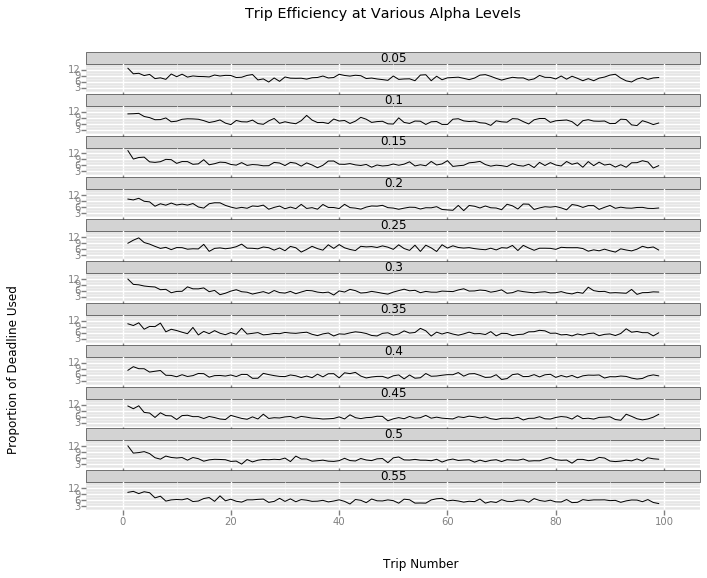

<ggplot: (14780637)>

In [4]:
temp = df[df['experiment']=='alpha'].groupby(['trip','alpha']).agg({'deadline':'max','Steps':'sum'})
temp['deadline']+=1
temp['UtilizedMoves'] = temp.apply(lambda t: t['Steps']/(t['deadline']*1.0), axis=1) 
temp = temp.reset_index()
temp
ggplot(temp, aes(x='trip', y='UtilizedMoves')) + facet_grid('alpha') + geom_line() + ggtitle('Trip Efficiency at Various Alpha Levels') + xlab('Trip Number') + ylab('Proportion of Deadline Used')

In [5]:
temp.groupby('alpha').mean()

,trip,Steps,deadline,UtilizedMoves
alpha,,,,
0.05,50,397.848485,49.181818,8.161123
0.10,50,355.171717,49.535354,7.250880
0.15,50,333.939394,49.383838,6.850565
0.20,50,314.121212,50.040404,6.341932
0.25,50,316.767677,48.323232,6.625482
0.30,50,291.363636,49.787879,5.884562
0.35,50,293.828283,48.727273,6.096704
0.40,50,278.202020,49.989899,5.618724
0.45,50,276.020202,49.080808,5.682125


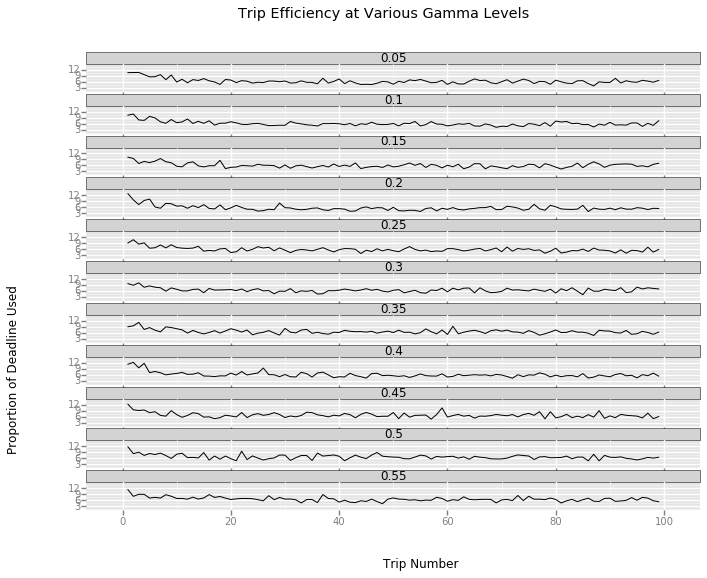

<ggplot: (14780490)>

In [6]:
temp = df[df['experiment']=='gamma'].groupby(['trip','gamma']).agg({'deadline':'max','Steps':'sum'})
temp['deadline']+=1
temp['UtilizedMoves'] = temp.apply(lambda t: t['Steps']/(t['deadline']*1.0), axis=1) 
temp = temp.reset_index()
temp
ggplot(temp, aes(x='trip', y='UtilizedMoves')) + facet_grid('gamma') + geom_line() + ggtitle('Trip Efficiency at Various Gamma Levels') + xlab('Trip Number') + ylab('Proportion of Deadline Used')

In [7]:
temp.groupby('gamma').mean()
# 0.5, 0.5 - 0.4494

,trip,Steps,deadline,UtilizedMoves
gamma,,,,
0.05,50,12.969697,29.838384,0.434345
0.10,50,13.747475,30.242424,0.460460
0.15,50,14.565657,30.797980,0.476937
0.20,50,15.121212,31.656566,0.496692
0.25,50,13.797980,30.747475,0.445588
0.30,50,14.010101,31.000000,0.458578
0.35,50,14.212121,31.050505,0.457648
0.40,50,13.717172,30.444444,0.460331
0.45,50,13.959596,31.101010,0.442545


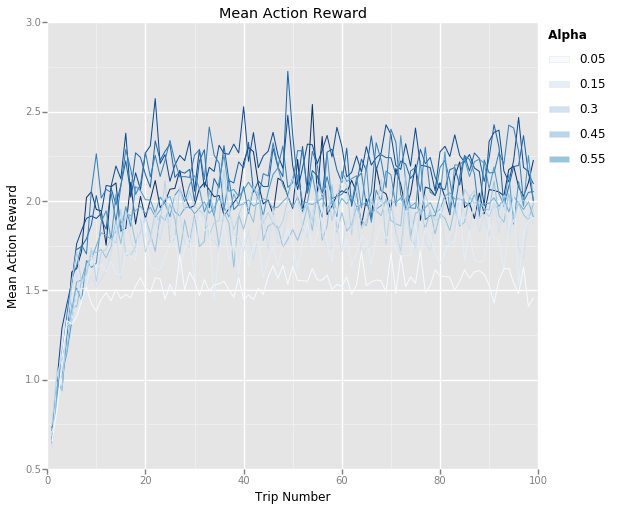

<ggplot: (14780581)>

In [7]:
tempq = df.groupby(['trip','alpha'])['reward'].mean().reset_index()
ggplot(tempq, aes(x='trip', y='reward',color='alpha')) + geom_line() + ggtitle('Mean Action Reward') + xlab('Trip Number') + ylab('Mean Action Reward')

In [9]:
# 0.5, 0.5 - 2.3768
tempq.groupby(['alpha','gamma']).mean()

KeyError: 'gamma'

In [ ]:
tempq = df.groupby(['trip','alpha'])['Error'].sum().reset_index()
ggplot(tempq, aes(x='trip', y='Error', color='alpha')) + geom_line() + ggtitle('Number of Penalties per Trip') + xlab('Trip Number') + ylab('Total Errors')


In [ ]:
tempq.groupby('alpha').mean()
# 0.5, 0.5 -  0.292929